Please create 3 informative visualizations about Covid-19 using Python in a Jupyter notebook, starting with the data set at https://www.kaggle.com/datasets/sambelkacem/covid19-algeria-and-world-dataset/code (Kaggle account is required).  Your solution may include the following;
 
<br>1. Convert data to a tidy format</br>
<br>2. Export to normalized tables in an SQLite3 database</br>
<br>3. Use SQL statements (using from within pandas is acceptable) to retrieve the data needed for each visualization</br>


We are looking for evidence of the following basic data science skills:

<br>Idiomatic Python</br>
<br>Jupyter notebooks</br>
<br>Literate programming</br>
<br>Experience with version control</br>
<br>Data processing skills</br>
<br>Relational database knowledge</br>
<br>Data visualization skills</br>


<br> Programming and storytelling skills </br>

### Installing dependencies

In [59]:
#!pip install -r requirements.txt 

In [6]:
!git init

Initialized empty Git repository in /Users/gjj980/Desktop/School/ASUS_MOVE/Full Time/SGH/.git/


In [7]:
!git remote add SGH_REPO https://github.com/JiaJun98/SGH_DDS_TakeHomeAssignment.git

In [13]:
!git add --all

In [15]:
!git commit -m "Adding all files required"

[main (root-commit) a8e3202] Adding all files required
 7 files changed, 377642 insertions(+)
 create mode 100644 .DS_Store
 create mode 100644 .ipynb_checkpoints/GohJiaJun_SGH_DDS_Take_home_assignment-checkpoint.ipynb
 create mode 100644 GohJiaJun_SGH_DDS_Take_home_assignment.ipynb
 create mode 100644 data/Data.csv
 create mode 100644 database.db
 create mode 100644 requirements.txt
 create mode 100644 ~$ke home assignment.docx


In [23]:
!git add GohJiaJun_SGH_DDS_Take_home_assignment.ipynb

In [26]:
!git remove

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   GohJiaJun_SGH_DDS_Take_home_assignment.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


### Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import missingno as msno
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
import sqlite3
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
current_path = os.getcwd()
folder_name = "data/Data.csv"
relative_folder_path = os.path.join(current_path,folder_name)
data_df = pd.read_csv(relative_folder_path)
data_df_copy = data_df.copy()

In [4]:
data_df_copy.head()

Entity Continent  Latitude  Longitude  Average temperature per year  \
0  Albania    Europe     41.15      20.17                            14   
1  Albania    Europe     41.15      20.17                            14   
2  Albania    Europe     41.15      20.17                            14   
3  Albania    Europe     41.15      20.17                            14   
4  Albania    Europe     41.15      20.17                            14   

   Hospital beds per 1000 people  Medical doctors per 1000 people  GDP/Capita  \
0                           2.89                             1.29      5353.2   
1                           2.89                             1.29      5353.2   
2                           2.89                             1.29      5353.2   
3                           2.89                             1.29      5353.2   
4                           2.89                             1.29      5353.2   

   Population  Median age  Population aged 65 and over (%)        Date  \
0     2873457          38                               14  2020-02-25   
1     2873457          38                               14  2020-02-26   
2     2873457          38                               14  2020-02-27   
3     2873457          38                               14  2020-02-28   
4     2873457          38                               14  2020-02-29   

   Daily tests  Cases  Deaths  
0          8.0    NaN     NaN  
1          5.0    NaN     NaN  
2          4.0    NaN     NaN  
3          1.0    NaN     NaN  
4          8.0    NaN     NaN

### Exploratory data analysis
#### 1.1 Understanding variables

In [5]:
#Checking for mislabelled data for categorical columns
print(f"Unique Entities: {data_df_copy['Entity'].unique()}\n")
print(f"Unique Continents: {data_df_copy['Continent'].unique()}")

Unique Entities: ['Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Bahrain'
 'Bangladesh' 'Belarus' 'Belgium' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Bulgaria' 'Canada' 'Cape Verde' 'Chile'
 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Denmark'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Ghana' 'Greece' 'Guatemala' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Latvia' 'Libya'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Malta'
 'Mauritania' 'Mexico' 'Mongolia' 'Morocco' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'New Zealand' 'Nigeria' 'Norway' 'Oman' 'Pakistan'
 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar'
 'Romania' 'Russia' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Serbia' 'Slovakia'
 'Slovenia' 'South Africa' 'South Korea' 'Sri Lanka' 'Sweden'
 'Switzerland' 'Thailand' 'Togo' 'Tri

#### 1.2 Datatypes

In [6]:
data_df_copy.dtypes #The datatype the column "Date" supposed to be datetime64

Entity                              object
Continent                           object
Latitude                           float64
Longitude                          float64
Average temperature per year         int64
Hospital beds per 1000 people      float64
Medical doctors per 1000 people    float64
GDP/Capita                         float64
Population                           int64
Median age                           int64
Population aged 65 and over (%)      int64
Date                                object
Daily tests                        float64
Cases                              float64
Deaths                             float64
dtype: object

In [7]:
#Changing data type
data_df_copy['Date'] = data_df_copy['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

#### From the output, there is no mislablled data for categorical columns

In [8]:
#Checking for invalid values(infinite value, negative for scalar columns like age) in numerical columns
data_df_copy.describe()

Latitude     Longitude  Average temperature per year  \
count  38472.000000  38472.000000                  38472.000000   
mean      23.737060     20.210847                     17.717145   
std       26.060413     61.074922                      8.134926   
min      -40.900000   -106.350000                     -2.000000   
25%        8.620000     -3.440000                     11.000000   
50%       27.510000     21.820000                     20.000000   
75%       45.940000     47.480000                     25.000000   
max       64.960000    179.410000                     29.000000   

       Hospital beds per 1000 people  Medical doctors per 1000 people  \
count                   38472.000000                     38472.000000   
mean                        3.165305                         2.086313   
std                         2.561767                         1.518252   
min                         0.200000                         0.020000   
25%                         1.400000                         0.820000   
50%                         2.500000                         1.890000   
75%                         4.490000                         3.210000   
max                        13.050000                         7.520000   

          GDP/Capita    Population    Median age  \
count   38472.000000  3.847200e+04  38472.000000   
mean    19002.331415  4.896983e+07     32.751508   
std     22271.107786  1.427251e+08      8.472305   
min       411.600000  3.412840e+05     16.000000   
25%      3659.000000  4.793900e+06     27.000000   
50%      8821.800000  1.148464e+07     32.000000   
75%     25946.200000  4.286296e+07     41.000000   
max    114704.600000  1.339180e+09     48.000000   

       Population aged 65 and over (%)   Daily tests         Cases  \
count                     38472.000000  3.057700e+04  3.821800e+04   
mean                         10.663392  3.944059e+04  2.879027e+05   
std                           6.770417  1.501847e+05  1.405243e+06   
min                           1.000000 -2.391720e+05  1.000000e+00   
25%                           5.000000  1.505000e+03  2.074000e+03   
50%                           8.000000  5.520000e+03  2.143100e+04   
75%                          16.000000  2.038200e+04  1.373770e+05   
max                          28.000000  2.945871e+06  2.860567e+07   

              Deaths  
count   34862.000000  
mean     8090.504733  
std     29548.753221  
min         1.000000  
25%        77.000000  
50%       527.000000  
75%      3480.500000  
max    513091.000000

From one glance, there is no invalid values in numerical columns

#### 1.3 Missing data

In [9]:
#To check the amount of missing data in each column
data_df_copy.isnull().sum()
num_Daily_tests_null = data_df_copy['Daily tests'].isnull().sum()
num_Cases_null = data_df_copy['Cases'].isnull().sum()
num_Deaths_null = data_df_copy['Deaths'].isnull().sum()

print(f"There is {round(num_Daily_tests_null/len(data_df_copy)*100,2)}% percentage of total rows in column Daily tests that is null")
print(f"There is {round(num_Cases_null/len(data_df_copy)*100,2)}% percentage of total rows in column Cases that is null")
print(f"There is {round(num_Deaths_null/len(data_df_copy)*100,2)}% percentage of total rows in column Deaths that is null")

There is 20.52% percentage of total rows in column Daily tests that is null
There is 0.66% percentage of total rows in column Cases that is null
There is 9.38% percentage of total rows in column Deaths that is null


In [10]:
#Checking for rows with at least one missing value
data_df_non_empty = data_df_copy.dropna(axis = 0)
print(len(data_df_non_empty))
missing_rows = len(data_df_copy) - len(data_df_non_empty)
print(f"Number of missing rows with at least one missing value: {missing_rows}")
print(f"That is {round(missing_rows/len(data_df_non_empty)*100,2)}% percentage of total rows")
data_df_non_empty.head()

28869
Number of missing rows with at least one missing value: 9603
That is 33.26% percentage of total rows


Entity Continent  Latitude  Longitude  Average temperature per year  \
15  Albania    Europe     41.15      20.17                            14   
16  Albania    Europe     41.15      20.17                            14   
17  Albania    Europe     41.15      20.17                            14   
18  Albania    Europe     41.15      20.17                            14   
19  Albania    Europe     41.15      20.17                            14   

    Hospital beds per 1000 people  Medical doctors per 1000 people  \
15                           2.89                             1.29   
16                           2.89                             1.29   
17                           2.89                             1.29   
18                           2.89                             1.29   
19                           2.89                             1.29   

    GDP/Capita  Population  Median age  Population aged 65 and over (%)  \
15      5353.2     2873457          38                               14   
16      5353.2     2873457          38                               14   
17      5353.2     2873457          38                               14   
18      5353.2     2873457          38                               14   
19      5353.2     2873457          38                               14   

         Date  Daily tests  Cases  Deaths  
15 2020-03-11         43.0   12.0     1.0  
16 2020-03-12        141.0   23.0     1.0  
17 2020-03-13        159.0   33.0     1.0  
18 2020-03-14         48.0   38.0     1.0  
19 2020-03-15         27.0   42.0     1.0

As such, deletion of missing data is not viable as it will lead to severe data loss

#### 1.2.1 Diagonising missing data
##### Using the missingno library, we will be able to see data visualisation of the missing datasets

<AxesSubplot:>

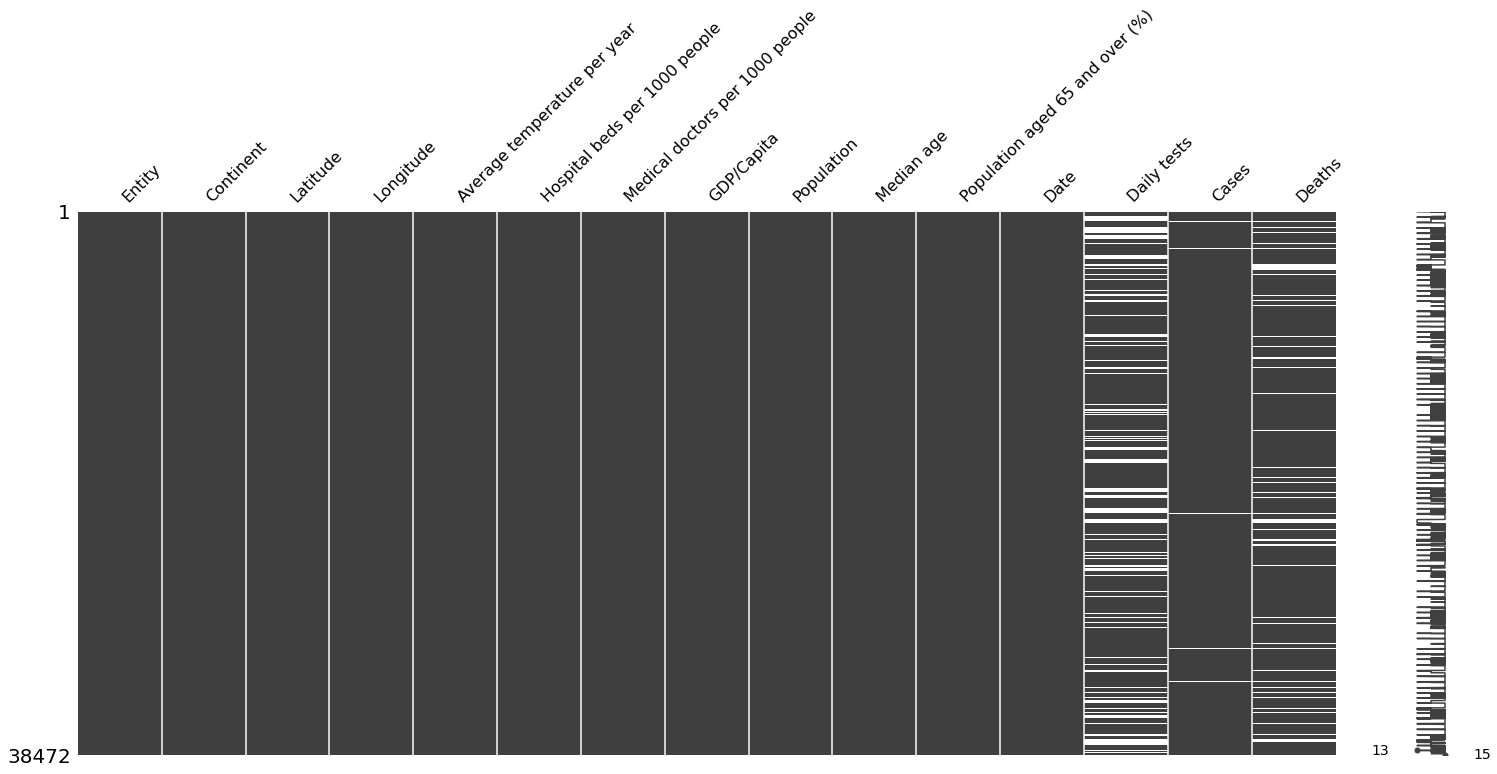

In [11]:
msno.matrix(data_df_copy)

<AxesSubplot:>

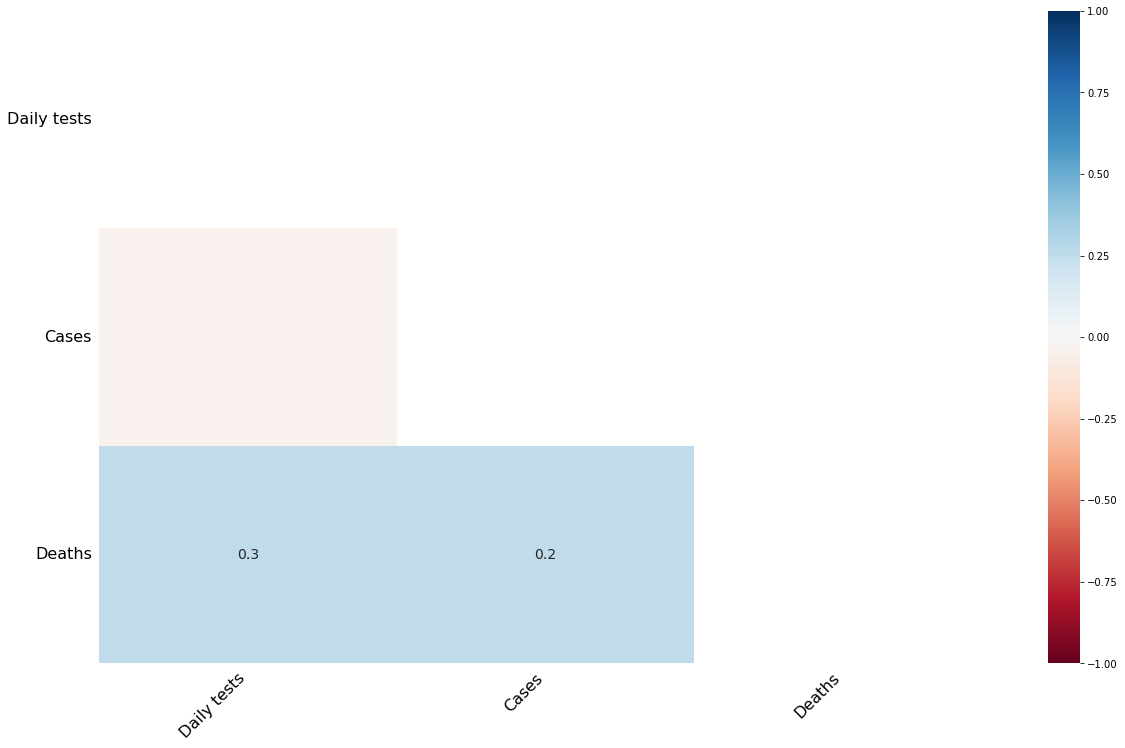

In [12]:
msno.heatmap(data_df_copy)

#### From the heatmap plot, we can conclude there is low positive pairwise correlation between each of the numerical features containing missing values

<AxesSubplot:>

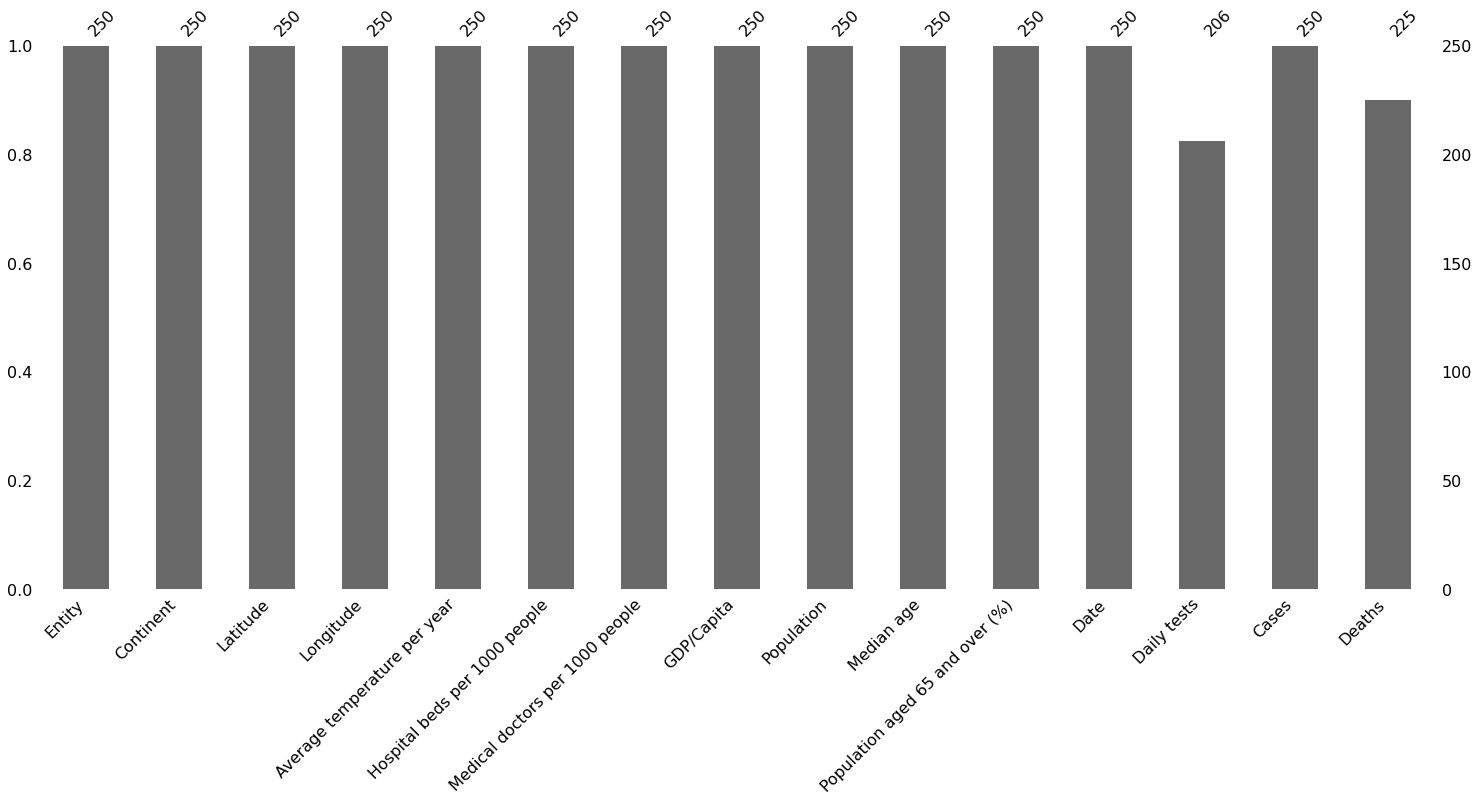

In [13]:
%matplotlib inline
msno.bar(data_df_copy.sample(250))

#### From the barplot, we can observe that the highest percentage of missing data is column 'Daily tests', 'Deaths' followed by 'Cases'

<AxesSubplot:>

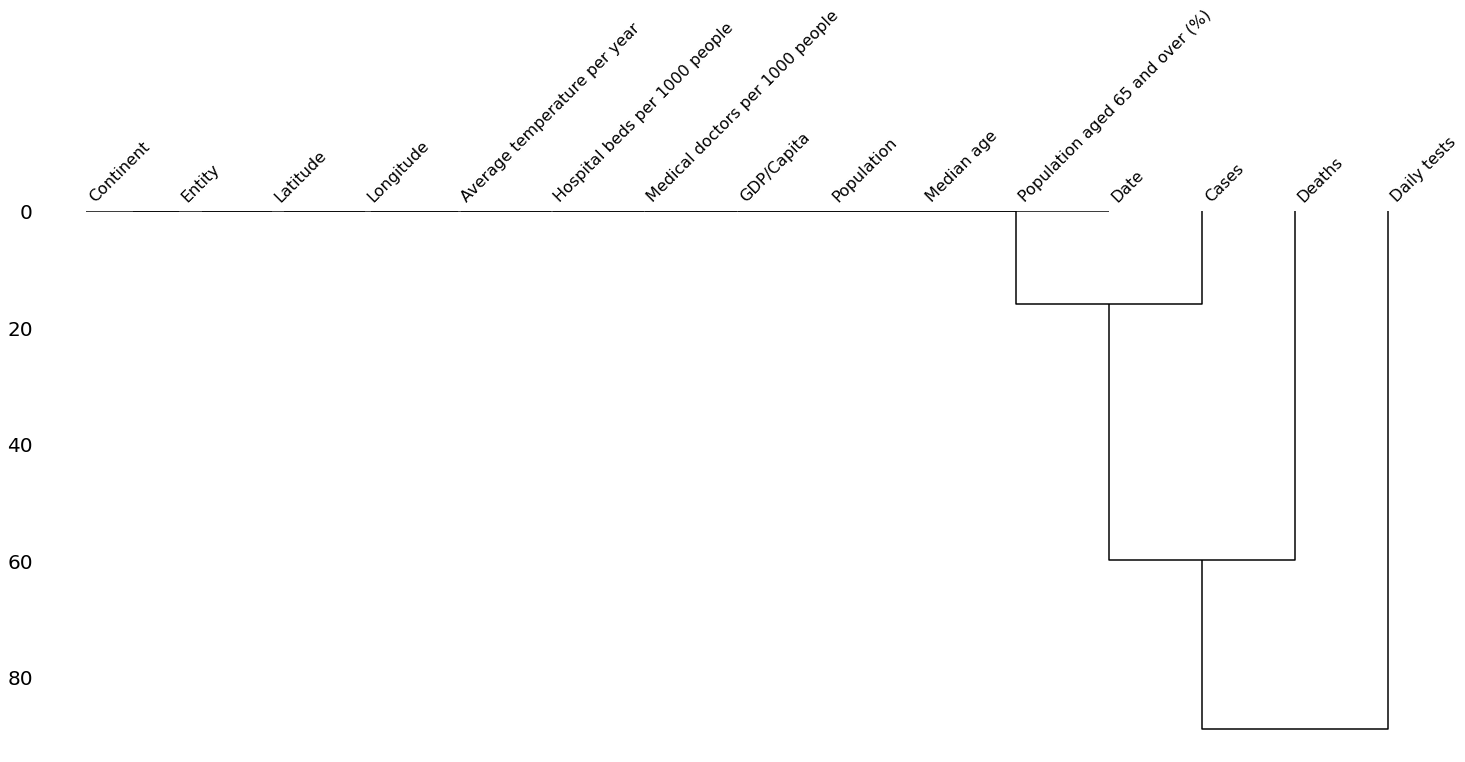

In [14]:
msno.dendrogram(data_df_copy)

##### From the dendogram, none of the three columns with missing data is directly related to each other

##### Hence, you can observe that all 3 columns of 'Daily tests', 'Deaths',  'Cases can be assumed to be Missing Completely at Random (MCAR) due them not significantly related to each other

#### 1.2.2 Treating missing data

To treat missing data in time series data, I have used a chaining of interpolation within groups with back filling
- Interpolating within group of "Entity" and "Continent" will be more nuanced as it estimates within specific groups
- As linear interpolation requires at least 2 known data points, some data at the start of the time line 01-01-20 of group may not have data point for interpolation before
- Backfill will be needed to fill the missing data that interpolation do not cover

In [15]:
#https://towardsdatascience.com/how-to-fill-missing-data-with-pandas-8cb875362a0d#:~:text=Forward%20fill%2C%20also%20known%20as,ffill%27%2C%20inplace%20%3D%20True)
data_df_copy['Daily tests'] = data_df_copy.groupby(['Entity','Continent'])['Daily tests'].apply(lambda x: x.interpolate(method='linear')).bfill()
data_df_copy['Cases'] = data_df_copy.groupby(['Entity','Continent'])['Cases'].apply(lambda x: x.interpolate(method='linear')).bfill()
data_df_copy['Deaths'] = data_df_copy.groupby(['Entity','Continent'])['Deaths'].apply(lambda x: x.interpolate(method='linear')).bfill()

In [16]:
data_df_copy.isna().sum()

Entity                             0
Continent                          0
Latitude                           0
Longitude                          0
Average temperature per year       0
Hospital beds per 1000 people      0
Medical doctors per 1000 people    0
GDP/Capita                         0
Population                         0
Median age                         0
Population aged 65 and over (%)    0
Date                               0
Daily tests                        0
Cases                              0
Deaths                             0
dtype: int64

#### As observed above, there is no longer any more missing value in the dataset

#### 1.3.1 Duplicated data

In [17]:
True in list(data_df_copy.duplicated())
#There are no duplicated data in the dataset

False

#### 1.3.2 Additional Data Maniupulation

In [46]:
data_df_copy['YearMonth'] = pd.to_datetime(data_df_copy['Date']).apply(lambda x: x.strftime("%Y-%m"))

### Exporting to normalised tables in SQLite3 database

In [47]:
#Creating ID as new column
data_df_copy_index = data_df_copy.reset_index().rename(columns={"index": "ID"})

In [48]:
data_df_copy_index.head(2)

ID   Entity Continent  Latitude  Longitude  Average temperature per year  \
0   0  Albania    Europe     41.15      20.17                            14   
1   1  Albania    Europe     41.15      20.17                            14   

   Hospital beds per 1000 people  Medical doctors per 1000 people  GDP/Capita  \
0                           2.89                             1.29      5353.2   
1                           2.89                             1.29      5353.2   

   Population  Median age  Population aged 65 and over (%)       Date  \
0     2873457          38                               14 2020-02-25   
1     2873457          38                               14 2020-02-26   

   Daily tests  Cases  Deaths YearMonth  
0          8.0    2.0     1.0   2020-02  
1          5.0    2.0     1.0   2020-02

### For a table of R(ID,Entity,Continent,Longitude,Latitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population ,Median age ,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths,YearMonth)

with 

{ID} -> {Entity} , {ID} -> {Continent}, {ID} -> {Longitude}, {ID} -> {Latitude}, 
{ID} -> {Average temperature per year}, {ID} -> {Hospital beds per 1000 people}, 
{ID} -> {Medical doctors per 1000 people}, {ID} -> {GDP/Capita}
{ID} -> {Median age}, {ID} -> {Population aged 65 and over}
{ID} -> {Daily tests}, {ID} -> {Cases},  {ID} -> {Deaths}, {ID} -> {YearMonth}

{Entity,Date} -> {Continent}, {Entity,Date} -> {Longitude}, {Entity,Date} -> {Latitude}, 
{Entity,Date} -> {Average temperature per year}, {Entity,Date} -> {Hospital beds per 1000 people}, 
{Entity,Date} -> {Medical doctors per 1000 people}, {Entity,Date} -> {GDP/Capita}
{Entity,Date} -> {Median age}, {Entity,Date} -> {Population aged 65 and over}
{Entity,Date} -> {Daily tests}, {Entity,Date} -> {Cases},  {Entity,Date} -> {Deaths}, {Entity,Date} -> {YearMonth}


##### List of Non-Trival and Decomposed Functional Dependencies(FD)
1.{ID,Entity,Continent,Longitude,Latitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population ,Median age ,Population aged 65 and over (%),YearMonth} -> {Daily tests}

2.{ID,Entity,Continent,Longitude,Latitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population ,Median age ,Population aged 65 and over (%),YearMonth} -> {Cases}

3.{ID,Entity,Continent,Longitude,Latitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population ,Median age ,Population aged 65 and over (%),YearMonth} -> {Deaths}

4.{Date,Entity,Continent,Longitude,Latitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population ,Median age ,Population aged 65 and over (%),YearMonth} -> {Daily tests}

5.{Date,Entity,Continent,Longitude,Latitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population ,Median age ,Population aged 65 and over (%),YearMonth} -> {Cases}

6.{Date,Entity,Continent,Longitude,Latitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population ,Median age ,Population aged 65 and over (%),YearMonth} -> {Deaths}

Since all non-trivial and decomposed FD has a superkey as its left hand side, 
the table is Boyces-Codd Normal Form(BCNF)
And since it is BCNF, it must also be 3-NormalForm, there will no need for decomposition

### Establishing an SQL network and exporting it to the SQLIte3

In [49]:
conn = sqlite3.connect('database.db')
data_df_copy_index.to_sql('data_df_copy_index', conn, if_exists='replace', index=False)

38472

### What do you want to plot?
A. I want to show daily cases of time frame per Entity, continent

B. I want to show daily death by time frame per Entity, continent

C. Aggregation of Entity and continent using Geospatial analysis overall across YearMonth time period

### Extracting queries from SQLite3 for Data Visualisations

In [50]:
CasesByContinentQuery = "SELECT Continent, Entity, YearMonth, SUM(Cases) AS Cases FROM data_df_copy_index GROUP BY Continent, Entity, YearMonth"
CasesByContinentQueryResults = conn.execute(CasesByContinentQuery)
DeathsByContinentQuery = "SELECT Continent, Entity, YearMonth, SUM(Deaths) AS Cases FROM data_df_copy_index GROUP BY Continent, Entity, YearMonth"
DeathsByContinentQueryResults = conn.execute(DeathsByContinentQuery)

### Converting back to Dataframe for plotting by the library Plotly

In [51]:
CasesByContinentQueryResults_lst = list(CasesByContinentQueryResults.fetchall())
DeathsByContinentQueryResults_lst = list(DeathsByContinentQueryResults.fetchall())
casesGroupby = pd.DataFrame(CasesByContinentQueryResults_lst, columns=["Continent", "Entity", "YearMonth", "Cases"])
deathsGroupby = pd.DataFrame(DeathsByContinentQueryResults_lst, columns=["Continent", "Entity", "YearMonth", "Deaths"])

### Visualisation 1: Time series Plot of Covid-19 Cases by Continent, Entity across the YearMonth time period

In [52]:
rows = 3
cols = 2
continents = ['Europe', 'Africa', 'Asia', 'North America', 'South America', 'Oceania'] #List of Continents
palette_list = ["Accent", "autumn", "Pastel1", "twilight_shifted_r", "viridis", "winter"] #Color Palette

fig = go.Figure()
fig = make_subplots(rows=3, cols=2)
continent_counter = 0
for row in range(1,rows+1):
    for col in range(1,cols+1):
        gb_continent = casesGroupby[casesGroupby["Continent"]==continents[continent_counter]]
        list_country = list(set(gb_continent["Entity"]))
        pal = list(sns.color_palette(palette=palette_list[continent_counter], n_colors=len(list_country)).as_hex())
        for d,p in zip(list_country, pal):
            fig.add_trace(go.Scatter(x = gb_continent[gb_continent['Entity']==d]['YearMonth'],
                                 y = gb_continent[gb_continent['Entity']==d]['Cases'],
                                 name = d,
                                 line_color = p, 
                                 fill=None,
                                 ),row = row
                                  ,col = col)
        fig.update_xaxes(title="Time", row=row, col=col)
        fig.update_yaxes(title=f"Covid-19 Cases in {continents[continent_counter]}", row=row, col=col)
        continent_counter +=1
fig.update_layout(width=1400, height=1000,
    margin=dict(l=30, r=30, t=30, b=30),
    paper_bgcolor="LightSteelBlue",
    title = "Time Series Plot of Covid-19 cases by Continent")
fig.update_layout(title=dict(x=0.5))
fig.show()

### Visualisation 2: Time series Plot of Covid-19 Deaths by Continent, Entity across the YearMonth time period

In [53]:
rows = 3
cols = 2
continents = ['Europe', 'Africa', 'Asia', 'North America', 'South America', 'Oceania'] #List of Continents
palette_list = ["Accent", "autumn", "Pastel1", "twilight_shifted_r", "viridis", "winter"] #Color Palette

fig = go.Figure()
fig = make_subplots(rows=3, cols=2)
continent_counter = 0
for row in range(1,rows+1):
    for col in range(1,cols+1):
        gb_continent = deathsGroupby[deathsGroupby["Continent"]==continents[continent_counter]]
        list_country = list(set(gb_continent["Entity"]))
        pal = list(sns.color_palette(palette=palette_list[continent_counter], n_colors=len(list_country)).as_hex())
        for d,p in zip(list_country, pal):
            fig.add_trace(go.Scatter(x = gb_continent[gb_continent['Entity']==d]['YearMonth'],
                                 y = gb_continent[gb_continent['Entity']==d]['Deaths'],
                                 name = d,
                                 line_color = p, 
                                 fill=None,
                                 ),row = row
                                  ,col = col)
        fig.update_xaxes(title="Time", row=row, col=col)
        fig.update_yaxes(title=f"Covid-19 Cases in {continents[continent_counter]}", row=row, col=col)
        continent_counter +=1
fig.update_layout(width=1400, height=1000,
    margin=dict(l=30, r=30, t=30, b=30),
    paper_bgcolor="LightSteelBlue",
    title = "Time Series Plot of Covid-19 Deaths by Continent")
fig.update_layout(title=dict(x=0.5))
fig.show()

### Visualisation 3: Geospatial analysis of Death Cases over time (YearMonth) of different countries grouped by different continents

### Extraction from SQLite3 for Data Visualisations

In [54]:
allQuery = "SELECT * FROM data_df_copy_index ORDER BY YearMonth, Continent, Entity"
allQueryResults = conn.execute(allQuery)
allQuery_lst = list(allQueryResults.fetchall())

# Get the column names
cursor = conn.cursor()
cursor.execute("PRAGMA table_info(data_df_copy_index)")
columns_df = [row[1] for row in cursor.fetchall()]

allQuery_lst_df = pd.DataFrame(allQuery_lst, columns= columns_df)

In [55]:
fig = px.scatter_geo(allQuery_lst_df,
                     lat="Latitude",  # Latitude coordinates
                     lon="Longitude",  # Longitude coordinates
                     color="Continent",  # Differentiate by Continent
                     title="Number of Global Covid-19 Deaths across Entity grouped by Continent over time",
                     size_max = 50,
                     hover_name="Entity",  # Show city names on hover
                     size="Cases",  # Size bubbles by population
                     animation_frame="YearMonth",  # Show frames for each year
                     projection="natural earth")

# Show figure
fig.show()